# 预测房价：回归问题
它预测一个连续值而不是离散的标签，例如，根据气象数据
预测明天的气温，或者根据软件说明书预测完成软件项目所需要的时间。


## 数据集说明 波士顿房价信息
    该数据集的数据点相对较少，只有506个，分为404个训练样本和 102 个测试样本。输入数据的每个特征（比如犯罪率）**都有不同的取值范围**。
    例如，有些特性是比例，取值范围为 0~1；有的取值范围为 1~12；还有的取值范围为 0~100，等等。

In [1]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

Using TensorFlow backend.


In [2]:
# 查看数据集的大小
print(train_data.shape)
print(train_targets.shape)
print(test_data.shape)
print(test_targets.shape)

(404, 13)
(404,)
(102, 13)
(102,)


## 数据标准化 
 - 标准化 : 数据分析项目中，数据来源不同，量纲及量纲单位不同，为了让它们具备可比性，需要采用标准化方法消除由此带来的偏差。原始数据经过数据标准化处理后，各指标处于同一数量级，适合进行综合对比评价。这就是数据标准化。基本原理：数值减去平均值，再除以其标准差，得到均值为0，标准差为1的服从标准正态分布的数据。
 - 归一化 : 归一化其实就是标准化的一种方式，只不过归一化是将数据映射到了[0,1]这个区间中

In [3]:
from sklearn.preprocessing import  StandardScaler
stand = StandardScaler()
stand.fit(train_data)
X_train = stand.transform(train_data)
X_test = stand.transform(test_data)

## 构建网络 
    由于样本数量很少，我们将使用一个非常小的网络，其中包含两个隐藏层，每层有 64 个单元。一般来说，训练数据越少，过拟合会越严重，而较小的网络可以降低过拟合。

In [4]:
from keras import models
from keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model


# 网络的最后一层只有一个单元，没有激活，是一个线性层。这是标量回归（标量回归是预
# 测单一连续值的回归）的典型设置。添加激活函数将会限制输出范围。例如，如果向最后一层
# 添加 sigmoid 激活函数，网络只能学会预测 0~1 范围内的值。这里最后一层是纯线性的，所以
# 网络可以学会预测任意范围内的值。
# 注意，编译网络用的是 mse 损失函数，即均方误差（MSE，mean squared error），预测值与
# 目标值之差的平方。这是回归问题常用的损失函数。在训练过程中还监控一个新指标：平均绝对误差（MAE，mean absolute error）。它是预测值
# 与目标值之差的绝对值。比如，如果这个问题的 MAE 等于 0.5，就表示你预测的房价与实际价
# 格平均相差 500 美元。


In [7]:
# k折验证（交叉验证）
import numpy as np
k = 4
num_val_samples = len(X_train) // k
num_epochs = 2
all_scores = []
for i in range(k):
    print('第{}折'.format(i))
    val_data = X_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([X_train[:i * num_val_samples],X_train[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]],axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

第0折
Epoch 1/2
303/303 [==============================] - 13s 42ms/step - loss: 222.5628 - mean_absolute_error: 11.2813
Epoch 2/2
303/303 [==============================] - 13s 42ms/step - loss: 31.5819 - mean_absolute_error: 3.9172
第1折
Epoch 1/2
303/303 [==============================] - 13s 43ms/step - loss: 181.9169 - mean_absolute_error: 9.8612
Epoch 2/2
303/303 [==============================] - 12s 41ms/step - loss: 33.6005 - mean_absolute_error: 3.7688
第2折
Epoch 1/2
303/303 [==============================] - 13s 43ms/step - loss: 243.3356 - mean_absolute_error: 11.6049
Epoch 2/2
303/303 [==============================] - 12s 41ms/step - loss: 33.0005 - mean_absolute_error: 3.8082
第3折
Epoch 1/2
303/303 [==============================] - 13s 42ms/step - loss: 185.4361 - mean_absolute_error: 10.5053
Epoch 2/2
303/303 [==============================] - 12s 41ms/step - loss: 28.7299 - mean_absolute_error: 3.5969


In [9]:
np.mean(all_scores)  # MAE

3.3182796003794905

In [17]:
k = 3
num_val_samples = len(X_train) // k
num_epochs = 2
all_mae_histories = [] 
for i in range(k):
    print('第{}折'.format(i))
    val_data = X_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([X_train[:i * num_val_samples],X_train[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]],axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,validation_data=(val_data, val_targets),epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

第0折
第1折
第2折


In [18]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

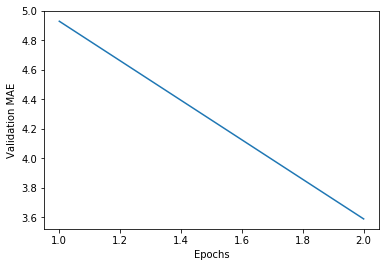

In [19]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [22]:
all_scores

[3.087570553959006, 3.1495323818508942, 3.1309681127567104, 3.905047352951352]

## 总结
- 回归问题使用的损失函数与分类问题不同。回归常用的损失函数是均方误差（MSE）。
-  同样，回归问题使用的评估指标也与分类问题不同。显而易见，精度的概念不适用于回
归问题。常见的回归指标是平均绝对误差（MAE）。
- 如果输入数据的特征具有不同的取值范围，应该先进行预处理，对每个特征单独进行
缩放。
- 如果可用的数据很少，使用 K 折验证可以可靠地评估模型。
- 如果可用的训练数据很少，最好使用隐藏层较少（通常只有一到两个）的小型网络，以
避免严重的过拟合。